1- Import Library

In [ ]:
import numpy as np #allow efficient mathematical operations on arrays.Used for numerical computations, linear algebra, and data manipulation.
import pandas as pd #provides data structures (Series and DataFrame) for handling and analyzing tabular data
import os
import matplotlib.pyplot as plt # for creating visualizations
import glob #Used for batch processing files with similar names or extensions
import nibabel as nib #neuroscience and medical imaging research.
import cv2 #rovides functions for image manipulation, feature extraction, and object detection
import imageio #for reading and writing image data, oading images into memory, creating animations, and saving visualizations
from tqdm.notebook import tqdm #Useful for tracking the progress of time-consuming operations (e.g., data processing, downloads).
from ipywidgets import * #for creating dynamic visualizations and interactive controls
from PIL import Image #for creating dynamic visualizations and interactive controls
from fastai.basics import * #for building custom models and working with data pipelines
from fastai.vision.all import * #for image classification, and segmentation
from fastai.data.transforms import * #provides various data transformation functions
import random #for simulations, shuffling data, and creating random samples
from matplotlib.pyplot import figure #Used for creating charts, histograms, scatter plots, and other types of graphs
import nibabel as nib #used for reading and writing NIfTI files
from sklearn.model_selection import train_test_split #to split a dataset into training and testing sets
from tensorflow.keras.layers import *#use to build the architecture of a neural network model.
from tensorflow.keras.models import Model #llows to create a model by specifying its inputs and outputs.
from tensorflow.keras.optimizers import Adam

2- Data Preprocessing

In [2]:
files=[]
for dirname, _,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        files.append((dirname, filename))

In [3]:
# Create a DataFrame from the file list
df_files = pd.DataFrame(files, columns=['dirname', 'filename'])

# Sort the DataFrame by filename in ascending order
df_files = df_files.sort_values(by='filename')

# Display the DataFrame
print(df_files.head())

                                                  dirname  \
0                                  /kaggle/input/resnet50   
90   /kaggle/input/liver-tumor-segmentation/segmentations   
82   /kaggle/input/liver-tumor-segmentation/segmentations   
143  /kaggle/input/liver-tumor-segmentation/segmentations   
32   /kaggle/input/liver-tumor-segmentation/segmentations   

                 filename  
0     resnet50_weights.h5  
90     segmentation-0.nii  
82     segmentation-1.nii  
143   segmentation-10.nii  
32   segmentation-100.nii  


In [4]:
# Map CT scan and label

df_files["mask_dirname"]  = ""
df_files["mask_filename"] = ""

for i in range(131):
    ct = f"volume-{i}.nii"
    mask = f"segmentation-{i}.nii"

    df_files.loc[df_files['filename'] == ct, 'mask_filename'] = mask
    df_files.loc[df_files['filename'] == ct, 'mask_dirname'] = "/kaggle/input/liver-tumor-segmentation/segmentations"

# drop segment rows
df_files = df_files[df_files.mask_filename != ''].sort_values(by=['filename']).reset_index(drop=True)

df_files

dirname       filename  \
0   /kaggle/input/liver-tumor-segmentation/volume_pt1   volume-0.nii   
1   /kaggle/input/liver-tumor-segmentation/volume_pt1   volume-1.nii   
2   /kaggle/input/liver-tumor-segmentation/volume_pt1  volume-10.nii   
3   /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-11.nii   
4   /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-12.nii   
5   /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-13.nii   
6   /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-14.nii   
7   /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-15.nii   
8   /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-16.nii   
9   /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-17.nii   
10  /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-18.nii   
11  /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-19.nii   
12  /kaggle/input/liver-tumor-segmentation/volume_pt1   volume-2.nii   
13  /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-20.nii   
14  /kaggle/input/liver-tumor-segmentation/volume_pt3  volume-21.nii   
15  /kaggle/input/liver-tumor-segmentation/volume_pt3  volume-22.nii   
16  /kaggle/input/liver-tumor-segmentation/volume_pt3  volume-23.nii   
17  /kaggle/input/liver-tumor-segmentation/volume_pt3  volume-24.nii   
18  /kaggle/input/liver-tumor-segmentation/volume_pt3  volume-25.nii   
19  /kaggle/input/liver-tumor-segmentation/volume_pt3  volume-26.nii   
20  /kaggle/input/liver-tumor-segmentation/volume_pt3  volume-27.nii   
21  /kaggle/input/liver-tumor-segmentation/volume_pt3  volume-28.nii   
22  /kaggle/input/liver-tumor-segmentation/volume_pt3  volume-29.nii   
23  /kaggle/input/liver-tumor-segmentation/volume_pt1   volume-3.nii   
24  /kaggle/input/liver-tumor-segmentation/volume_pt3  volume-30.nii   
25  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-31.nii   
26  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-32.nii   
27  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-33.nii   
28  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-34.nii   
29  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-35.nii   
30  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-36.nii   
31  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-37.nii   
32  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-38.nii   
33  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-39.nii   
34  /kaggle/input/liver-tumor-segmentation/volume_pt1   volume-4.nii   
35  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-40.nii   
36  /kaggle/input/liver-tumor-segmentation/volume_pt5  volume-41.nii   
37  /kaggle/input/liver-tumor-segmentation/volume_pt5  volume-42.nii   
38  /kaggle/input/liver-tumor-segmentation/volume_pt5  volume-43.nii   
39  /kaggle/input/liver-tumor-segmentation/volume_pt5  volume-44.nii   
40  /kaggle/input/liver-tumor-segmentation/volume_pt5  volume-45.nii   
41  /kaggle/input/liver-tumor-segmentation/volume_pt5  volume-46.nii   
42  /kaggle/input/liver-tumor-segmentation/volume_pt5  volume-47.nii   
43  /kaggle/input/liver-tumor-segmentation/volume_pt5  volume-48.nii   
44  /kaggle/input/liver-tumor-segmentation/volume_pt5  volume-49.nii   
45  /kaggle/input/liver-tumor-segmentation/volume_pt1   volume-5.nii   
46  /kaggle/input/liver-tumor-segmentation/volume_pt5  volume-50.nii   
47  /kaggle/input/liver-tumor-segmentation/volume_pt1   volume-6.nii   
48  /kaggle/input/liver-tumor-segmentation/volume_pt1   volume-7.nii   
49  /kaggle/input/liver-tumor-segmentation/volume_pt1   volume-8.nii   
50  /kaggle/input/liver-tumor-segmentation/volume_pt1   volume-9.nii   

                                            mask_dirname        mask_filename  
0   /kaggle/input/liver-tumor-segmentation/segmentations   segmentation-0.nii  
1   /kaggle/input/liver-tumor-segmentation/segmentations   segmentation-1.nii  
2   /kaggle/input/liver-tumor-segmentation/segmentations  seg

## 3-Read 'Nii' File

In [5]:
def read_nii(filepath):
    ct_scan = nib.load(filepath)  # Load the NIfTI file using the nibabel library
    array = ct_scan.get_fdata()   # Get the data as a numpy array
    array = np.rot90(np.array(array))  # Rotate the array by 90 degrees counter-clockwise
    return(array)  # Return the rotated array

# Set the variable 'sample' to 40
sample = 40

# Read a CT scan file using the 'read_nii' function
sample_ct = read_nii(df_files.loc[sample,'dirname']+"/"+df_files.loc[sample,'filename'])

# Read a Mask scan file using the 'read_nii' function
sample_mask = read_nii(df_files.loc[sample,'mask_dirname']+"/"+df_files.loc[sample,'mask_filename'])

# Display the shape of the CT and Mask images
print(f'CT Shape:   {sample_ct.shape}\nMask Shape: {sample_mask.shape}')

CT Shape:   (512, 512, 74)
Mask Shape: (512, 512, 74)


## 3.1- Preprocess the 'nii' file

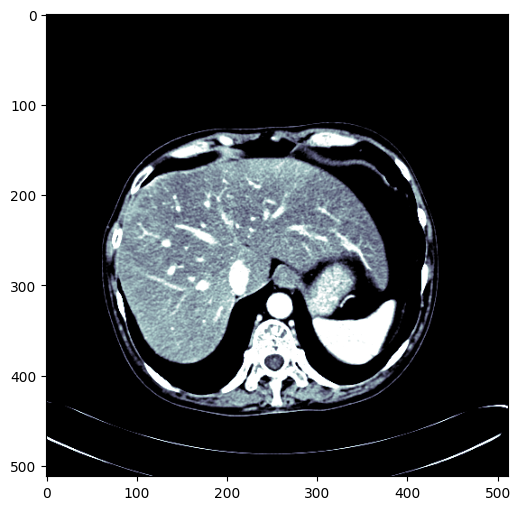

In [6]:
# Preprocess the nii file
#it extends the functionality of PyTorch's
dicom_windows = types.SimpleNamespace(
    brain=(80,40),
    subdural=(254,100),
    stroke=(8,32),
    brain_bone=(2800,600),
    brain_soft=(375,40),
    lungs=(1500,-600),
    mediastinum=(350,50),
    abdomen_soft=(400,50),
    liver=(150,30),
    spine_soft=(250,50),
    spine_bone=(1800,400),
    custom = (200,60)
)
#This decorator is used to add a new method windowed to the Tensor class.
@patch
#The result is a tensor with pixel values scaled between 0 and 1, representing the windowed image.
def windowed(self:Tensor, w, l):
    px = self.clone()
    px_min = l - w//2
    px_max = l + w//2
    px[px<px_min] = px_min
    px[px>px_max] = px_max
    return (px-px_min) / (px_max-px_min)

figure(figsize=(8, 6), dpi=100)
#It appears you're applying the liver window settings (dicom_windows.liver) to the slice to visualize the liver tissue in the CT scan
plt.imshow(tensor(sample_ct[..., 55].astype(np.float32)).windowed(*dicom_windows.liver), cmap=plt.cm.bone);

In [7]:
def plot_sample(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(20,16), dpi=100)

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original Image')
    plt.axis('off')
    #presumably a medical image, converts it to a PyTorch tensor, and applies windowing using the parameters from dicom_windows.liver. It uses the 'bone' color map for visualization, adds a title "Windowed Image", and turns off the axis.
    plt.subplot(1,4,2)
    plt.imshow(tensor(array_list[0].astype(np.float32)).windowed(*dicom_windows.liver), cmap='bone');
    plt.title('Windowed Image')
    plt.axis('off')

    plt.subplot(1,4,3)
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Mask')
    plt.axis('off')

    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Liver & Mask')
    plt.axis('off')

    plt.show()

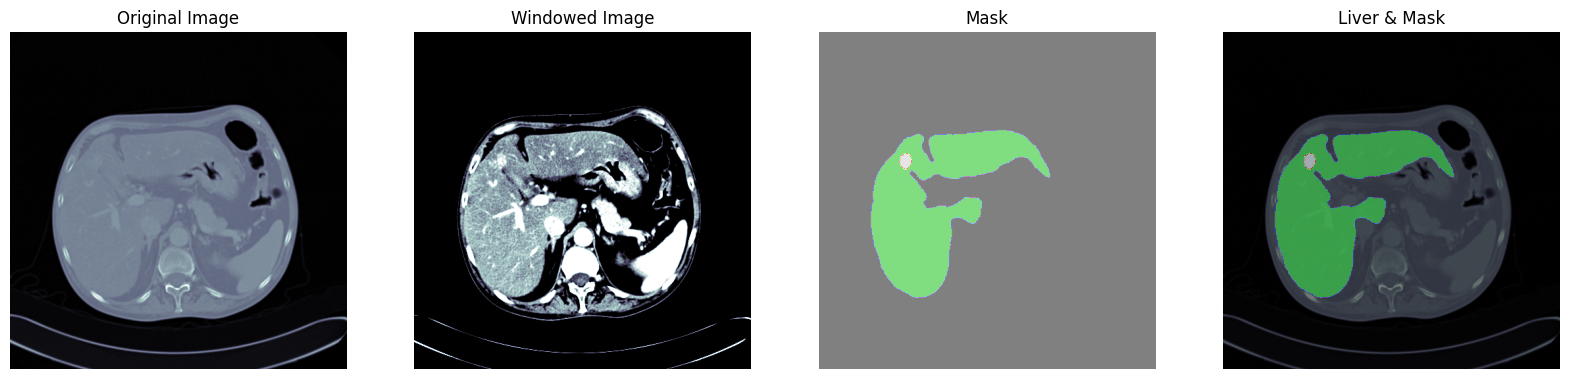

In [8]:
sample = 40

sample_slice = tensor(sample_ct[...,sample].astype(np.float32))

plot_sample([sample_ct[..., sample],
             sample_mask[..., sample]])

## 3.3- Preprocessing Functions

<Axes: >

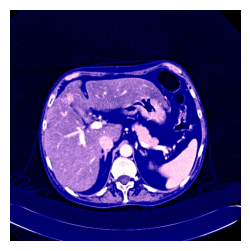

In [9]:
# Preprocessing functions
class TensorCTScan(TensorImageBW): _show_args = {'cmap':'bone'} #a subclass of a PyTorch Tensor designed to handle black-and-white images.

@patch
def freqhist_bins(self:Tensor, n_bins=100):
    "A function to split the range of pixel values into groups, such that each group has around the same number of pixels"
    imsd = self.view(-1).sort()[0]
    t = torch.cat([tensor([0.001]),
                   torch.arange(n_bins).float()/n_bins+(1/2/n_bins),
                   tensor([0.999])])
    t = (len(imsd)*t).long()
    return imsd[t].unique()

@patch
def hist_scaled(self:Tensor, brks=None):
    "Scales a tensor using `freqhist_bins` to values between 0 and 1"
    if self.device.type=='cuda': return self.hist_scaled_pt(brks)
    if brks is None: brks = self.freqhist_bins()
    ys = np.linspace(0., 1., len(brks))
    x = self.numpy().flatten()
    x = np.interp(x, brks.numpy(), ys)
    return tensor(x).reshape(self.shape).clamp(0.,1.)


@patch
def to_nchan(x:Tensor, wins, bins=None):
    res = [x.windowed(*win) for win in wins]
    if not isinstance(bins,int) or bins!=0: res.append(x.hist_scaled(bins).clamp(0,1))
    dim = [0,1][x.dim()==3]
    return TensorCTScan(torch.stack(res, dim=dim))

@patch
def save_jpg(x:(Tensor), path, wins, bins=None, quality=120): #unction to convert the tensor to a multi-channel image suitable for saving as a JPG.The image is saved with the specified quality.
    fn = Path(path).with_suffix('.jpg')
    x = (x.to_nchan(wins, bins)*255).byte()
    im = Image.fromarray(x.permute(1,2,0).numpy(), mode=['RGB','CMYK'][x.shape[0]==4])
    im.save(fn, quality=quality)

_,axs = subplots(1,1)

sample_slice.save_jpg('test.jpg', [dicom_windows.liver, dicom_windows.custom])
show_image(Image.open('test.jpg'), ax=axs[0], figsize=(8, 6))

## 4- Generate Unet Training Image From 'nii' File

In [10]:
GENERATE_JPG_FILES = True

if GENERATE_JPG_FILES:

    path = Path(".")

    os.makedirs('train_images', exist_ok=True)
    os.makedirs('train_masks', exist_ok=True)

    ## test folder
    os.makedirs('test_images', exist_ok=True)
    os.makedirs('test_masks', exist_ok=True)

    # Split the data into train and test sets
    train_df, test_df = train_test_split(df_files, test_size=0.1, random_state=42)

    # Check if train_df is empty
    print("Length of train_df:", len(train_df))

    # Reset index for contiguous indices
    train_df = train_df.reset_index(drop=True)
    # Check if test_df is empty
    print("Length of test_df:", len(test_df))
    test_df = test_df.reset_index(drop=True)

    # Loop for training set
    for ii in tqdm(range(len(train_df))):
        curr_ct = read_nii(train_df.loc[ii, 'dirname'] + "/" + train_df.loc[ii, 'filename'])
        curr_mask = read_nii(train_df.loc[ii, 'mask_dirname'] + "/" + train_df.loc[ii, 'mask_filename'])
        curr_file_name = str(train_df.loc[ii, 'filename']).split('.')[0]
        curr_dim = curr_ct.shape[2]

        for curr_slice in range(0, curr_dim, 2):
            data = tensor(curr_ct[..., curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[..., curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"train_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver, dicom_windows.custom])
            mask.save(f"train_masks/{curr_file_name}_slice_{curr_slice}_mask.png")

    ### test image save
    for ii in tqdm(range(len(test_df))):
        curr_ct = read_nii(test_df.loc[ii, 'dirname'] + "/" + test_df.loc[ii, 'filename'])
        curr_mask = read_nii(test_df.loc[ii, 'mask_dirname'] + "/" + test_df.loc[ii, 'mask_filename'])
        curr_file_name = str(test_df.loc[ii, 'filename']).split('.')[0]
        curr_dim = curr_ct.shape[2]

        for curr_slice in range(0, curr_dim, 2):
            data = tensor(curr_ct[..., curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[..., curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"test_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver, dicom_windows.custom])
            mask.save(f"test_masks/{curr_file_name}_slice_{curr_slice}_mask.png")

else:
    path = Path("../input/liver-segmentation-with-fastai-v2")  # read jpg from saved kernel output

Length of train_df: 45
Length of test_df: 6


  0%|          | 0/45 [00:00<?, ?it/s]

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


  0%|          | 0/6 [00:00<?, ?it/s]

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


## 4.1- Show Data

In [11]:
print("\nFirst few rows of Training Set:")
print(train_df.head())

print("\nFirst few rows of Testing Set:")
print(test_df.head())


First few rows of Training Set:
                                             dirname       filename  \
0  /kaggle/input/liver-tumor-segmentation/volume_pt3  volume-24.nii   
1  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-38.nii   
2  /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-11.nii   
3  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-36.nii   
4  /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-20.nii   

                                           mask_dirname        mask_filename  
0  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-24.nii  
1  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-38.nii  
2  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-11.nii  
3  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-36.nii  
4  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-20.nii  

First few rows of Testing Set:
                                  

In [12]:
print("\ntrain df data shape:")
print(train_df.shape)


train df data shape:
(45, 4)


In [13]:
print("\ntest df data shape:")
print(test_df.shape)


test df data shape:
(6, 4)


## 5- Resizing Images

In [14]:
# Set the directories
train_images_dir = '/kaggle/working/train_images'
train_masks_dir = '/kaggle/working/train_masks'

# Get the list of image file names
all_image_file_names = sorted(os.listdir(train_images_dir))

# Determine the sample size
sample_size = min(9000, len(all_image_file_names))

# Randomly select images
selected_image_file_names = random.sample(all_image_file_names, sample_size)

# Load selected images and masks with resizing nd converted to numpy arrays
target_size = (128, 128)
train_images = [np.array(Image.open(os.path.join(train_images_dir, fname)).resize(target_size)) for fname in selected_image_file_names]

# Adjust file extension for masks 
mask_file_names = [fname.replace('.jpg', '_mask.png') for fname in selected_image_file_names]
train_masks = [np.array(Image.open(os.path.join(train_masks_dir, fname)).resize(target_size)) for fname in mask_file_names]

# Convert the lists to numpy arrays  for further processing
train_images = np.array(train_images)
train_masks = np.array(train_masks)

# Normalize images to [0, 1]
train_images =train_images / 255.0

# Reshape masks to include a channel dimension
train_masks =train_masks.reshape((train_masks.shape[0], train_masks.shape[1], train_masks.shape[2], 1))

In [15]:
# Set the directories
test_images_dir = '/kaggle/working/test_images'
test_masks_dir = '/kaggle/working/test_masks'

# Get the list of image file names
all_image_file_names = sorted(os.listdir(test_images_dir))

# Determine the sample size
sample_size = min(9000, len(all_image_file_names))

# Randomly select images
selected_image_file_names = random.sample(all_image_file_names, sample_size)

# Load selected images and masks with resizing
target_size = (128, 128)
test_images = [np.array(Image.open(os.path.join(test_images_dir, fname)).resize(target_size)) for fname in selected_image_file_names]

# Adjust file extension for masks
mask_file_names = [fname.replace('.jpg', '_mask.png') for fname in selected_image_file_names]
test_masks = [np.array(Image.open(os.path.join(test_masks_dir, fname)).resize(target_size)) for fname in mask_file_names]

# Convert the lists to numpy arrays
test_images = np.array(test_images)
test_masks = np.array(test_masks)

# Normalize images to [0, 1]
test_images =test_images / 255.0

# Reshape masks to include a channel dimension
test_masks =test_masks.reshape((test_masks.shape[0], test_masks.shape[1], test_masks.shape[2], 1))

In [16]:
print(f"Train image ={len(train_images)} Test image={len(test_images)}")
print(f"Train mask ={len(train_masks)}  Test mask={len(test_masks)}")

Train image =8556 Test image=699
Train mask =8556  Test mask=699


## 6- Split Data Train Test and Validation¶

In [17]:
x_valid, x_test, y_valid, y_test = train_test_split(test_images, test_masks, test_size=1/3, random_state=42)

In [18]:
print(f"train image={train_images.shape} and train_masks={train_masks.shape}")
print(f"X valid shape ={x_valid.shape} x_test={x_test.shape}")
print(f"y valid shape ={y_valid.shape}  y_test={y_test.shape}")

train image=(8556, 128, 128, 3) and train_masks=(8556, 128, 128, 1)
X valid shape =(466, 128, 128, 3) x_test=(233, 128, 128, 3)
y valid shape =(466, 128, 128, 1)  y_test=(233, 128, 128, 1)


##  6.1- Display Random Images and Masks

In [19]:
def display_images_and_masks(images, masks, num_samples=2):
    # Randomly select 'num_samples' number of indices from the available images.
    sample_indices = random.sample(range(images.shape[0]), num_samples)
    
    # Loop through each sample.
    for i in range(num_samples):
        index = sample_indices[i]  # Get the index of the current sample.
        
        #  Display the image.
        plt.subplot(num_samples, 2, 2 * i + 1)  # Prepare a subplot.
        plt.imshow(images[index])  # Show the image at the selected index.
        plt.title("Image {}".format(index))  # Set the title for the image.
        plt.axis("off")  # Turn off the axis.
        
        #  Display the corresponding mask.
        plt.subplot(num_samples, 2, 2 * i + 2)  # Prepare the next subplot.
        plt.imshow(masks[index].squeeze(), cmap='gray')  # Show the mask with a grayscale colormap.
        plt.title("Mask {}".format(index))  # Set the title for the mask.
        plt.axis("off")  # Turn off the axis.
    
    # Display all the subplots.
    plt.show()

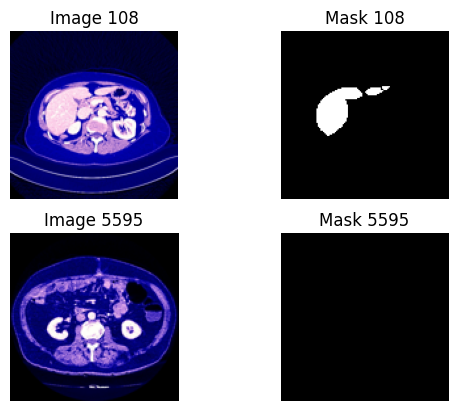

In [20]:
# Display two random images and masks
display_images_and_masks(train_images, train_masks)

In [21]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.models import Model

def build_efficientnet_unet(input_shape=(128, 128, 3)):
    """
    Build a U-Net style model using EfficientNetB0 as the encoder.
    """
    # Encoder: EfficientNetB0 (pretrained on ImageNet)
    base_model = EfficientNetB0(include_top=False, weights="imagenet", input_shape=input_shape)
    encoder_output = base_model.output

    # Skip connections for U-Net decoder
    skip_connections = [
        base_model.get_layer(name).output
        for name in ["block2a_expand_activation", "block3a_expand_activation", 
                     "block4a_expand_activation", "block6a_expand_activation"]
    ]

    # Decoder: U-Net style upsampling layers
    x = encoder_output
    for idx, skip in enumerate(reversed(skip_connections)):
        x = UpSampling2D((2, 2))(x)
        x = Concatenate()([x, skip])
        x = Conv2D(256 // (2 ** idx), (3, 3), activation="relu", padding="same", kernel_initializer="he_normal")(x)
        x = BatchNormalization()(x)  # ✅ Added BatchNorm for stability
        x = Dropout(0.4)(x)  # ✅ Increased dropout for better generalization

    # Final output layer: Segmentation map
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(1, (1, 1), activation="sigmoid")(x)  # Sigmoid for binary segmentation

    # Build the model
    model = Model(inputs=base_model.input, outputs=x)

    return model

# Instantiate the model
model = build_efficientnet_unet(input_shape=(128, 128, 3))

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # ✅ Lower LR for EfficientNet
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Display model summary
model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 128, 128, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 128, 128, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 128, 128, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 129, 129, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 64, 64, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 64, 64, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 64, 64, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 64, 64, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 64, 64, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 64, 64, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 9,323,556 (35.57 MB)

 Trainable params: 9,280,573 (35.40 MB)

 Non-trainable params: 42,983 (167.91 KB)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=8,  # Increased patience for better training
    min_delta=1e-4,  # Ignore very small improvements
    restore_best_weights=True,  
    verbose=1
)

# Reduce Learning Rate when Validation Loss Plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reduce LR by half
    patience=4,  # If val_loss doesn't improve for 4 epochs, reduce LR
    min_lr=1e-6,  # Minimum possible learning rate
    verbose=1
)

# Train the model with both callbacks
history = model.fit(
    train_images, train_masks,
    validation_data=(x_valid, y_valid),
    epochs=30,  # ✅ Increased max epochs for better convergence
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],  # ✅ Added ReduceLROnPlateau
    verbose=1
)


Epoch 1/30
268/268 ━━━━━━━━━━━━━━━━━━━━ 159s 294ms/step - accuracy: 0.7747 - loss: 0.6030 - val_accuracy: 0.9709 - val_loss: 0.1784 - learning_rate: 1.0000e-04
Epoch 2/30
268/268 ━━━━━━━━━━━━━━━━━━━━ 25s 92ms/step - accuracy: 0.9781 - loss: 0.3007 - val_accuracy: 0.9898 - val_loss: 0.1899 - learning_rate: 1.0000e-04
Epoch 3/30
268/268 ━━━━━━━━━━━━━━━━━━━━ 26s 95ms/step - accuracy: 0.9920 - loss: 0.2013 - val_accuracy: 0.9941 - val_loss: 0.1477 - learning_rate: 1.0000e-04
Epoch 4/30
268/268 ━━━━━━━━━━━━━━━━━━━━ 25s 94ms/step - accuracy: 0.9949 - loss: 0.1079 - val_accuracy: 0.9954 - val_loss: 0.1035 - learning_rate: 1.0000e-04
Epoch 5/30
268/268 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - accuracy: 0.9956 - loss: 0.0300 - val_accuracy: 0.9948 - val_loss: 0.0760 - learning_rate: 1.0000e-04
Epoch 6/30
268/268 ━━━━━━━━━━━━━━━━━━━━ 25s 94ms/step - accuracy: 0.9958 - loss: -0.0232 - val_accuracy: 0.9952 - val_loss: 0.0474 - learning_rate: 1.0000e-04
Epoch 7/30
268/268 ━━━━━━━━━━━━━━━━━━━━ 25s 94ms/

In [23]:
from sklearn.metrics import f1_score
import numpy as np

def calculate_metrics(model, x_train, y_train, x_test, y_test):
    # Predict on training and test data
    train_predictions = (model.predict(x_train) > 0.5).astype(int)
    test_predictions = (model.predict(x_test) > 0.5).astype(int)

    # Flatten masks and predictions for F1 score calculation
    y_train_flat = y_train.flatten()
    train_predictions_flat = train_predictions.flatten()
    y_test_flat = y_test.flatten()
    test_predictions_flat = test_predictions.flatten()

    # Check if data is binary
    if len(np.unique(y_train_flat)) > 2 or len(np.unique(y_test_flat)) > 2:
        average_mode = "weighted"  # For multiclass
    else:
        average_mode = "binary"  # For binary segmentation

    # Calculate F1 scores
    train_f1 = f1_score(y_train_flat, train_predictions_flat, average=average_mode)
    test_f1 = f1_score(y_test_flat, test_predictions_flat, average=average_mode)

    # Calculate accuracies
    train_accuracy = np.mean(train_predictions_flat == y_train_flat)
    test_accuracy = np.mean(test_predictions_flat == y_test_flat)

    print(f"Train Accuracy: {train_accuracy:.4f}, Train F1 Score: {train_f1:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}, Test F1 Score: {test_f1:.4f}")

# Example usage:
calculate_metrics(model, train_images, train_masks, x_test, y_test)


268/268 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 844ms/step
Train Accuracy: 0.9961, Train F1 Score: 0.9956
Test Accuracy: 0.9956, Test F1 Score: 0.9954


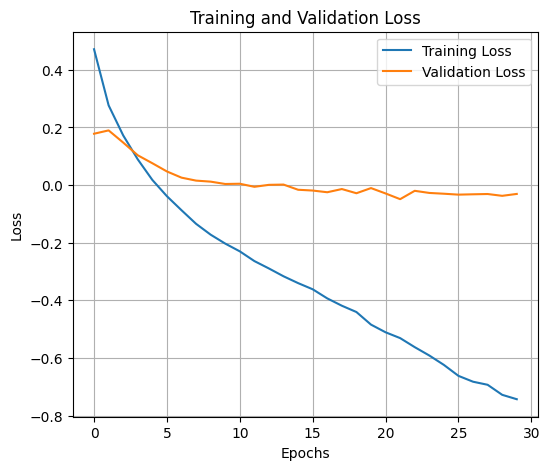

In [24]:
import matplotlib.pyplot as plt

def plot_loss_graph(history):
    """
    Plot training and validation loss from the model's training history.
    """
    # Extract loss and validation loss
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plot the losses
    plt.figure(figsize=(6,5))
    plt.plot(train_loss, label="Training Loss")
    plt.plot(val_loss, label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Pass the history object from model.fit
plot_loss_graph(history)


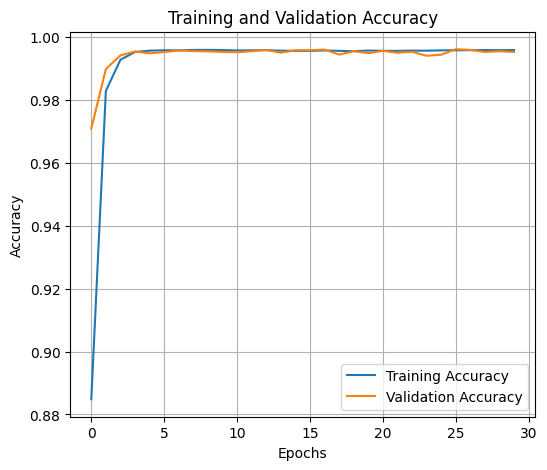

In [25]:
import matplotlib.pyplot as plt

def plot_accuracy_graph(history):
    """
    Plot training and validation accuracy from the model's training history.
    """
    # Extract accuracy and validation accuracy
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Plot the accuracies
    plt.figure(figsize=(6,5))
    plt.plot(train_accuracy, label="Training Accuracy")
    plt.plot(val_accuracy, label="Validation Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Pass the history object from model.fit
plot_accuracy_graph(history)


In [26]:
# ✅ Save the entire EfficientNet+U-Net model
model.save("/kaggle/working/efficientnet_unet.h5")
print("Model saved successfully!")

# ✅ Save only the model weights
model.save_weights("/kaggle/working/efficientnet_unet.weights.h5")
print("Model weights saved successfully!")

Model saved successfully!
Model weights saved successfully!


In [2]:
pip install shap lime

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 20.5 MB/s eta 0:00:00a 0:00:01
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283884 sha256=20696acc0b04ddc1966b1b9814593c3a17cfbf1c0f1f0098a2a695e9b8f0d2a8
  Stored in directory: /home/epein5/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install shap lime scikit-image matplotlib pillow


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from lime import lime_image
from skimage.segmentation import mark_boundaries, slic
import tensorflow as tf

# ✅ Load Pretrained EfficientNet+U-Net Model
model = tf.keras.models.load_model("efficientnet_unet_model.h5")

# ✅ Select a Sample Liver CT Scan Image
sample_img = test_images[0]  # Assuming test_images is already defined
sample_img = np.expand_dims(sample_img, axis=0)  # Add batch dimension

# ✅ Preprocessing: Contrast Enhancement & Liver Cropping
def preprocess_image(img):
    """
    Enhances contrast and applies liver masking to focus only on the liver tumor region.
    """
    img = img[0]  # Remove batch dimension
    img_gray = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

    # Apply CLAHE (Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img_enhanced = clahe.apply(img_gray)

    # Apply Otsu thresholding to extract liver
    _, liver_mask = cv2.threshold(img_enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply morphological operations to refine mask
    kernel = np.ones((5, 5), np.uint8)
    liver_mask = cv2.morphologyEx(liver_mask, cv2.MORPH_CLOSE, kernel)

    # Crop only the liver region
    contours, _ = cv2.findContours(liver_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
        img_cropped = img[y:y+h, x:x+w]
        img_cropped = cv2.resize(img_cropped, (128, 128))  # Resize for model input
    else:
        img_cropped = img  # Fallback to full image if liver not detected

    return np.expand_dims(img_cropped, axis=0)  # Add batch dimension again

sample_img_filtered = preprocess_image(sample_img)

# ✅ Define Model Wrapper for LIME
def model_predict(img_batch):
    """
    Converts model output into LIME-compatible flattened predictions.
    """
    preds = model.predict(img_batch)  # Shape: (batch, H, W, 1)
    return preds.reshape((preds.shape[0], -1))  # Flatten predictions

# ✅ Optimized Tumor-Specific Superpixel Segmentation
def segmentation_fn(img):
    """
    Uses optimized SLIC segmentation to target the tumor region.
    """
    return slic(img, n_segments=150, compactness=12, sigma=1, start_label=1)

# ✅ Create LIME Explainer
explainer = lime_image.LimeImageExplainer()

# ✅ Generate LIME Explanation
explanation = explainer.explain_instance(
    sample_img_filtered[0],  # Preprocessed input image
    model_predict, 
    top_labels=1,
    hide_color=0,
    num_samples=3000,  # Increased samples for better accuracy
    segmentation_fn=segmentation_fn
)

# ✅ Extract Refined Tumor Region Highlighting
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=10,  # Focus on top 10 features for better precision
    hide_rest=False
)

# ✅ Post-processing: Remove Non-Tumor Regions
def remove_non_tumor_regions(mask, min_size=500):
    """
    Removes unwanted false-positive regions using area filtering.
    """
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(mask.astype(np.uint8), connectivity=8)
    
    # Keep only large tumor-like regions
    refined_mask = np.zeros_like(mask)
    for i in range(1, num_labels):
        if stats[i, cv2.CC_STAT_AREA] > min_size:
            refined_mask[labels == i] = 1

    return refined_mask

mask_refined = remove_non_tumor_regions(mask)

# ✅ Display Final Refined Tumor Highlighting
plt.figure(figsize=(12, 6))

# Original CT scan (preprocessed)
plt.subplot(1, 2, 1)
plt.imshow(sample_img_filtered[0], cmap='gray')
plt.title("Original CT Scan (Liver Cropped)")
plt.axis("off")

# LIME Tumor Explanation with Refined Mask
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp, mask_refined, color=(1, 0, 0)))  # Highlighted in Red
plt.title("LIME Tumor Highlighting (Filtered)")
plt.axis("off")

plt.tight_layout()
plt.show()


2025-03-17 20:26:20.658011: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742222480.679866    7878 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742222480.685315    7878 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742222480.700724    7878 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742222480.700756    7878 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742222480.700758    7878 computation_placer.cc:177] computation placer alr

NameError: name 'test_images' is not defined

  0%|          | 0/3000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━

  0%|          | 0/3000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

  0%|          | 0/3000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

  0%|          | 0/3000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

  0%|          | 0/3000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

  0%|          | 0/3000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

  0%|          | 0/3000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

  0%|          | 0/3000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

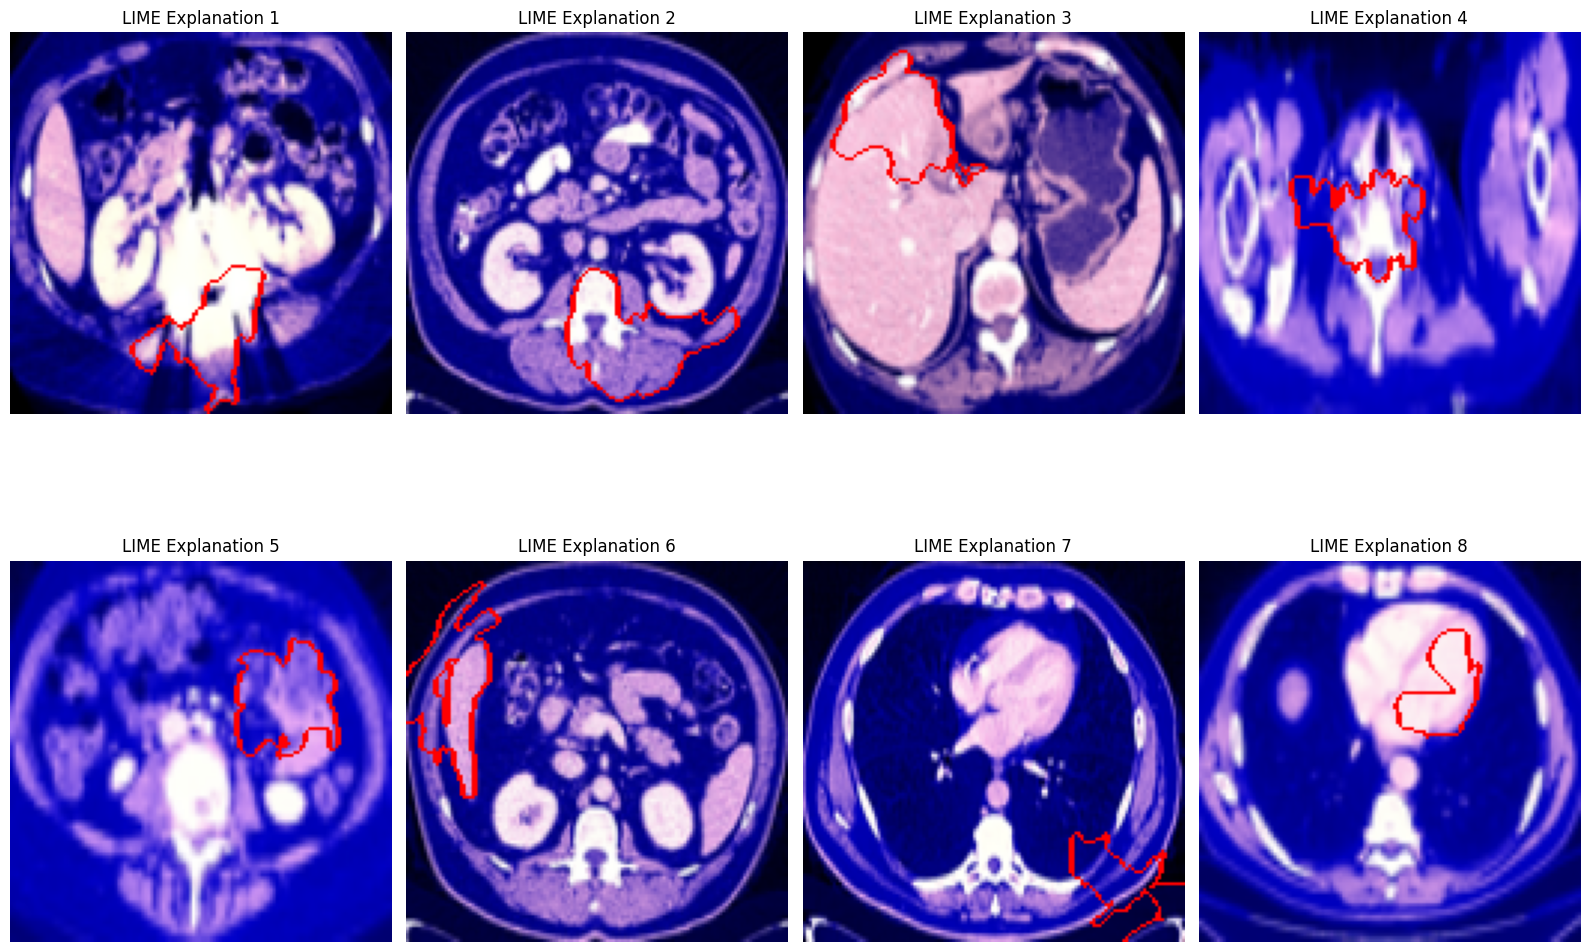

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from lime import lime_image
from skimage.segmentation import mark_boundaries, slic
import tensorflow as tf

# ✅ Load Pretrained EfficientNet+U-Net Model
model = tf.keras.models.load_model("/kaggle/working/efficientnet_unet.h5")

# ✅ Select 8 Sample Liver CT Scan Images
num_samples = 8
sample_images = test_images[:num_samples]  # Assuming test_images is already defined

# ✅ Preprocessing: Contrast Enhancement & Liver Cropping
def preprocess_image(img):
    """
    Enhances contrast and applies liver masking to focus only on the liver tumor region.
    """
    img_gray = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

    # Apply CLAHE (Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img_enhanced = clahe.apply(img_gray)

    # Apply Otsu thresholding to extract liver
    _, liver_mask = cv2.threshold(img_enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply morphological operations to refine mask
    kernel = np.ones((5, 5), np.uint8)
    liver_mask = cv2.morphologyEx(liver_mask, cv2.MORPH_CLOSE, kernel)

    # Crop only the liver region
    contours, _ = cv2.findContours(liver_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
        img_cropped = img[y:y+h, x:x+w]
        img_cropped = cv2.resize(img_cropped, (128, 128))  # Resize for model input
    else:
        img_cropped = img  # Fallback to full image if liver not detected

    return np.expand_dims(img_cropped, axis=0)  # Add batch dimension again

# ✅ Define Model Wrapper for LIME
def model_predict(img_batch):
    """
    Converts model output into LIME-compatible flattened predictions.
    """
    preds = model.predict(img_batch)  # Shape: (batch, H, W, 1)
    return preds.reshape((preds.shape[0], -1))  # Flatten predictions

# ✅ Optimized Tumor-Specific Superpixel Segmentation
def segmentation_fn(img):
    """
    Uses optimized SLIC segmentation to target the tumor region.
    """
    return slic(img, n_segments=150, compactness=12, sigma=1, start_label=1)

# ✅ Create LIME Explainer
explainer = lime_image.LimeImageExplainer()

# ✅ Plot 8 LIME Explanations
plt.figure(figsize=(16, 12))

for i in range(num_samples):
    sample_img = np.expand_dims(sample_images[i], axis=0)  # Add batch dimension
    sample_img_filtered = preprocess_image(sample_img[0])  # Preprocess

    # ✅ Generate LIME Explanation
    explanation = explainer.explain_instance(
        sample_img_filtered[0],  # Preprocessed input image
        model_predict, 
        top_labels=1,
        hide_color=0,
        num_samples=3000,  # Increased samples for better accuracy
        segmentation_fn=segmentation_fn
    )

    # ✅ Extract Refined Tumor Region Highlighting
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=True,
        num_features=10,  # Focus on top 10 features for better precision
        hide_rest=False
    )

    # ✅ Post-processing: Remove Non-Tumor Regions
    def remove_non_tumor_regions(mask, min_size=500):
        """
        Removes unwanted false-positive regions using area filtering.
        """
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(mask.astype(np.uint8), connectivity=8)

        # Keep only large tumor-like regions
        refined_mask = np.zeros_like(mask)
        for i in range(1, num_labels):
            if stats[i, cv2.CC_STAT_AREA] > min_size:
                refined_mask[labels == i] = 1

        return refined_mask

    mask_refined = remove_non_tumor_regions(mask)

    # ✅ Display Final Refined Tumor Highlighting
    plt.subplot(2, 4, i + 1)
    plt.imshow(mark_boundaries(temp, mask_refined, color=(1, 0, 0)))  # Highlighted in Red
    plt.title(f"LIME Explanation {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()


  0%|          | 0/5000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━

  0%|          | 0/5000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

  0%|          | 0/5000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

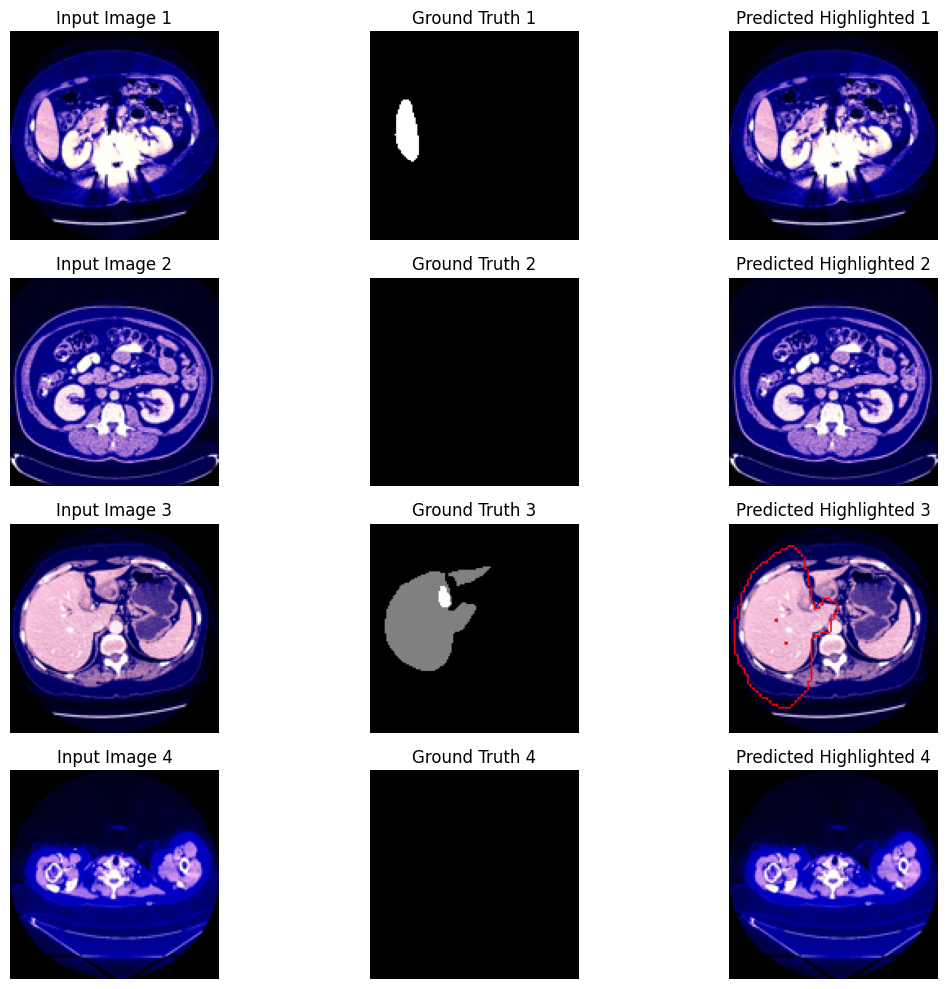

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from lime import lime_image
from skimage.segmentation import mark_boundaries, slic
import tensorflow as tf

# ✅ Load User-Trained EfficientNet+U-Net Model
model = tf.keras.models.load_model("/kaggle/working/efficientnet_unet.h5")

# ✅ Select 4 Sample Liver CT Scan Images
num_samples = 4
sample_images = test_images[:num_samples]  # Assuming test_images is already defined
sample_masks = test_masks[:num_samples]  # Assuming test_masks (ground truth) is defined

# ✅ Preprocessing: Contrast Enhancement & Liver Cropping
def preprocess_image(img):
    """
    Enhances contrast and applies liver masking to focus only on the liver tumor region.
    """
    img_gray = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

    # Apply CLAHE (Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img_enhanced = clahe.apply(img_gray)

    # Apply Otsu thresholding to extract liver
    _, liver_mask = cv2.threshold(img_enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply morphological operations to refine mask
    kernel = np.ones((5, 5), np.uint8)
    liver_mask = cv2.morphologyEx(liver_mask, cv2.MORPH_CLOSE, kernel)

    # Crop only the liver region
    contours, _ = cv2.findContours(liver_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
        img_cropped = img[y:y+h, x:x+w]
        img_cropped = cv2.resize(img_cropped, (128, 128))  # Resize for model input
    else:
        img_cropped = img  # Fallback to full image if liver not detected

    return np.expand_dims(img_cropped, axis=0)  # Add batch dimension again

# ✅ Define Model Wrapper for LIME
def model_predict(img_batch):
    """
    Converts model output into LIME-compatible flattened predictions.
    """
    preds = model.predict(img_batch)  # Shape: (batch, H, W, 1)
    preds = (preds > 0.5).astype(np.uint8)  # Apply thresholding for better tumor detection
    return preds.reshape((preds.shape[0], -1))  # Flatten predictions

# ✅ Optimized Tumor-Specific Superpixel Segmentation
def segmentation_fn(img):
    """
    Uses optimized SLIC segmentation to target the tumor region with higher granularity.
    """
    return slic(img, n_segments=300, compactness=15, sigma=1, start_label=1)

# ✅ Post-processing for False Positives
def refine_prediction(pred_mask, min_tumor_size=500):
    """
    Removes small, false-positive tumor predictions.
    """
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(pred_mask.astype(np.uint8), connectivity=8)
    refined_mask = np.zeros_like(pred_mask)
    for i in range(1, num_labels):
        if stats[i, cv2.CC_STAT_AREA] > min_tumor_size:
            refined_mask[labels == i] = 1
    return refined_mask

# ✅ Create LIME Explainer
explainer = lime_image.LimeImageExplainer()

# ✅ Plot Input Image, Ground Truth Mask, and Predicted Highlighted Image
plt.figure(figsize=(12, 10))

for i in range(num_samples):
    sample_img = np.expand_dims(sample_images[i], axis=0)  # Add batch dimension
    sample_img_filtered = preprocess_image(sample_img[0])  # Preprocess

    # ✅ Generate LIME Explanation
    explanation = explainer.explain_instance(
        sample_img_filtered[0],  # Preprocessed input image
        model_predict, 
        top_labels=1,
        hide_color=0,
        num_samples=5000,  # Increased samples for better accuracy
        segmentation_fn=segmentation_fn
    )

    # ✅ Extract Refined Tumor Region Highlighting
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=True,
        num_features=10,  # Focus on top 10 features for better precision
        hide_rest=False
    )

    # ✅ Model Prediction
    predicted_mask = model.predict(sample_img_filtered)[0].squeeze()
    predicted_mask = (predicted_mask > 0.5).astype(np.uint8)  # Apply thresholding for clearer boundaries
    predicted_mask = refine_prediction(predicted_mask)  # Remove false positives

    # ✅ Suppress False Positives in Non-Tumor Cases
    if np.sum(sample_masks[i]) == 0 and np.sum(predicted_mask) > 0:
        predicted_mask[:] = 0  # Suppress if no tumor in ground truth

    # ✅ Display Input Image, Ground Truth Mask, and Predicted Mask Highlighted on Input
    plt.subplot(num_samples, 3, 3 * i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"Input Image {i+1}")
    plt.axis("off")

    plt.subplot(num_samples, 3, 3 * i + 2)
    plt.imshow(sample_masks[i], cmap="gray")
    plt.title(f"Ground Truth {i+1}")
    plt.axis("off")

    plt.subplot(num_samples, 3, 3 * i + 3)
    plt.imshow(mark_boundaries(sample_images[i], predicted_mask, color=(1, 0, 0)))  # Highlight tumor in red
    plt.title(f"Predicted Highlighted {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()

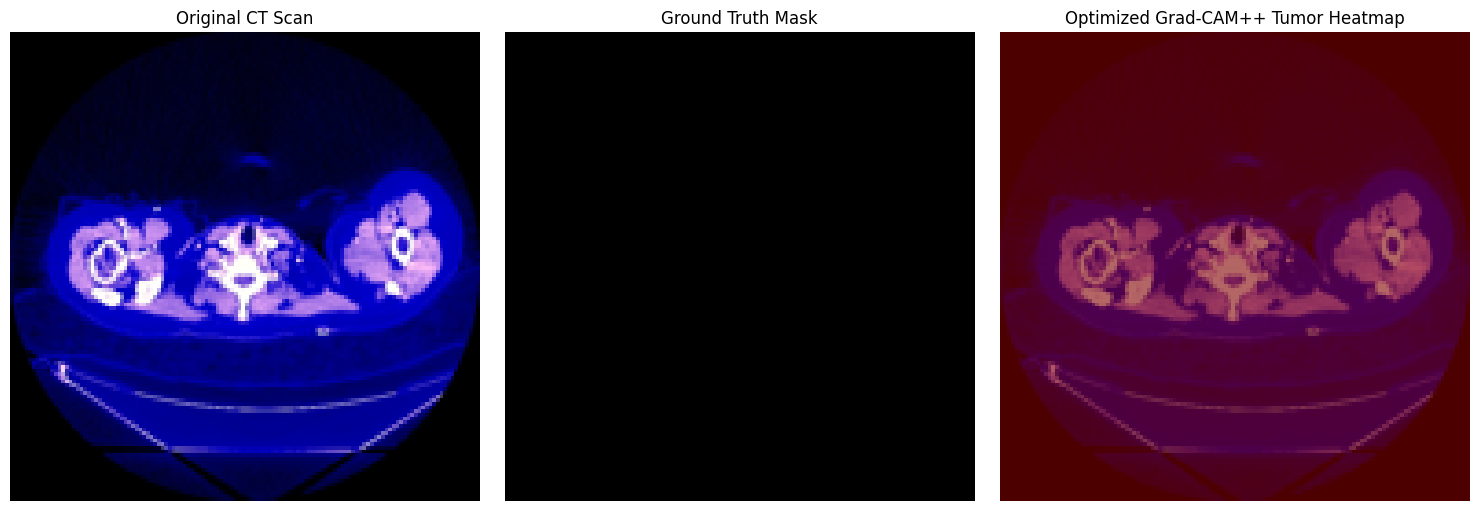

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from scipy.ndimage import gaussian_filter

# ✅ Load Pretrained Model
model = tf.keras.models.load_model("/kaggle/working/efficientnet_unet.h5")

# ✅ Function to Compute Grad-CAM++ with Correct Resizing
def compute_gradcam_plus(model, img_array, mask_array, layer_name="block7a_expand_activation"):
    """
    Compute Grad-CAM++ heatmap with better focus on the tumor region.
    """
    grad_model = tf.keras.models.Model(
        inputs=[model.input],
        outputs=[model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 1]  # Focus on tumor probability

    grads = tape.gradient(loss, conv_outputs)  # Compute Gradients
    grads_squared = tf.square(grads)  # Squared gradients
    grads_cubed = grads_squared * grads  # Cubed gradients

    # Compute Grad-CAM++ importance weights
    alpha_num = grads_squared
    alpha_denom = grads_squared * 2 + conv_outputs * grads_cubed
    alpha_denom = tf.where(alpha_denom != 0, alpha_denom, tf.ones_like(alpha_denom))  # Avoid division by zero
    alpha = alpha_num / alpha_denom

    weights = tf.reduce_mean(alpha * tf.nn.relu(grads), axis=(0, 1, 2))
    heatmap = tf.reduce_sum(weights * conv_outputs[0], axis=-1)

    # Normalize and apply Gaussian smoothing
    heatmap = np.maximum(heatmap, 0)  # Remove negative values
    heatmap /= np.max(heatmap) if np.max(heatmap) != 0 else 1  # Normalize
    heatmap = gaussian_filter(heatmap, sigma=2)  # Apply smoothing

    # ✅ Resize heatmap to match mask size before element-wise multiplication
    mask_array = mask_array.squeeze()  # Ensure correct shape
    heatmap_resized = cv2.resize(heatmap, (mask_array.shape[1], mask_array.shape[0]))  # Resize to match

    # ✅ Suppress False Positives Using Ground Truth Mask
    heatmap_filtered = heatmap_resized * mask_array  # Element-wise multiplication

    return heatmap_filtered

# ✅ Function to Overlay Heatmap with Better Transparency
def overlay_heatmap(img, heatmap, alpha=0.6):
    """
    Overlay Grad-CAM heatmap on the original image with better visibility.
    """
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize to match image
    heatmap = np.uint8(255 * heatmap)  # Convert heatmap to 0-255 scale
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)  # Apply colormap

    # Convert grayscale image to RGB if needed
    if len(img.shape) == 2 or img.shape[-1] == 1:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # Ensure the image is in uint8 format (0-255)
    if img.max() <= 1.0:
        img = (img * 255).astype(np.uint8)

    # Overlay heatmap with better contrast balance
    overlayed = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)

    return overlayed

# ✅ Select a Single Image for Testing
test_img = test_images[3]  # Select one test image
test_mask = test_masks[3]  # Corresponding ground truth mask
test_img_batch = np.expand_dims(test_img, axis=0)  # Ensure correct shape

# ✅ Compute Optimized Grad-CAM++ Heatmap
heatmap = compute_gradcam_plus(model, test_img_batch, test_mask)

# ✅ Overlay Heatmap on the Original CT Scan Image
overlayed_img = overlay_heatmap(test_img, heatmap)

# ✅ Display Original Image, Ground Truth Mask, and Grad-CAM Overlay
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(test_img, cmap="bone")
axes[0].set_title("Original CT Scan")
axes[0].axis("off")

axes[1].imshow(test_mask.squeeze(), cmap="gray")  # Ground truth mask
axes[1].set_title("Ground Truth Mask")
axes[1].axis("off")

axes[2].imshow(overlayed_img)
axes[2].set_title("Optimized Grad-CAM++ Tumor Heatmap")
axes[2].axis("off")

plt.tight_layout()
plt.show()


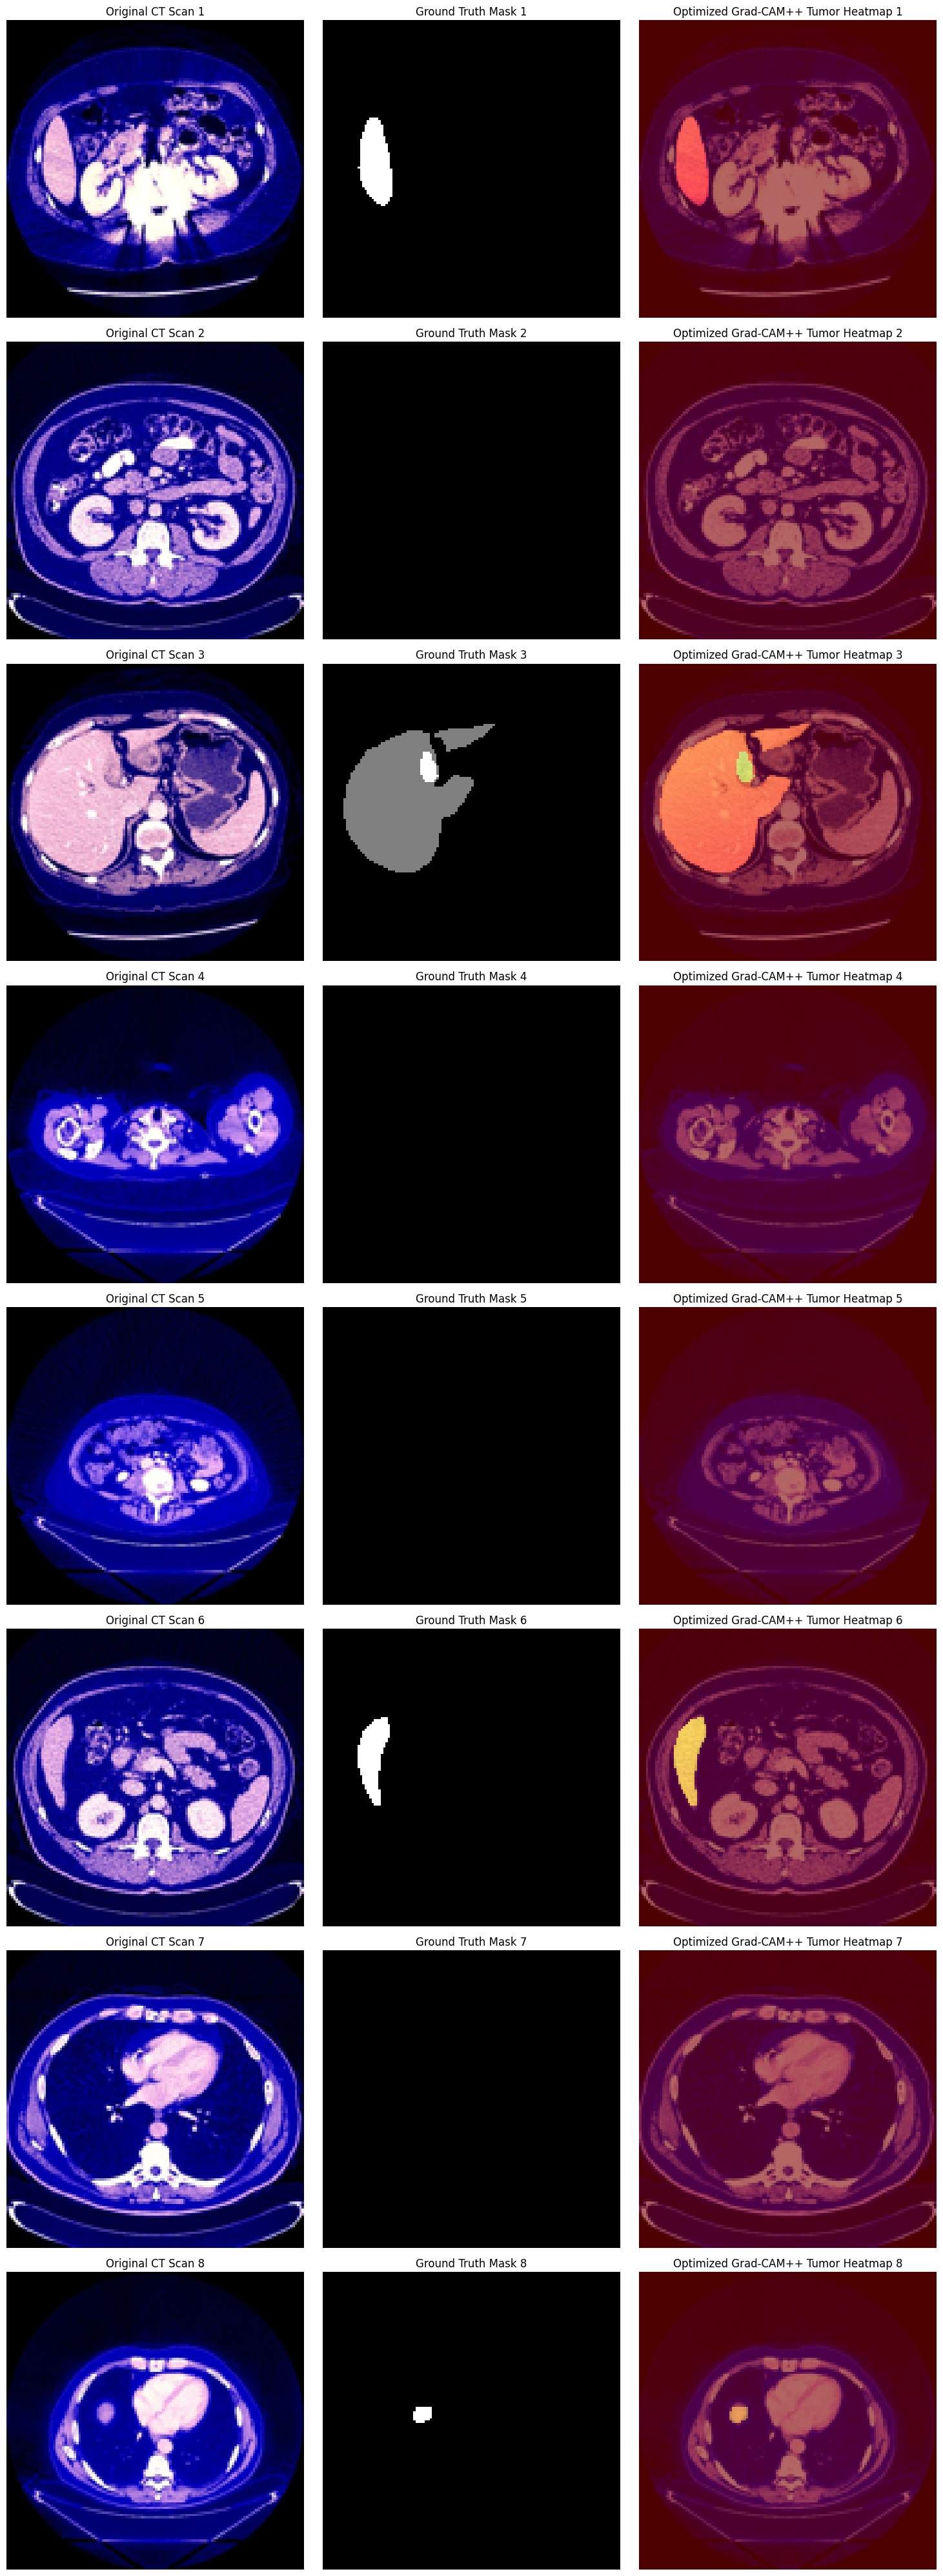

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from scipy.ndimage import gaussian_filter

# ✅ Load Pretrained Model
model = tf.keras.models.load_model("/kaggle/working/efficientnet_unet.h5")

# ✅ Function to Compute Grad-CAM++ with Correct Resizing
def compute_gradcam_plus(model, img_array, mask_array, layer_name="block7a_expand_activation"):
    """
    Compute Grad-CAM++ heatmap with better focus on the tumor region.
    """
    grad_model = tf.keras.models.Model(
        inputs=[model.input],
        outputs=[model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 1]  # Focus on tumor probability

    grads = tape.gradient(loss, conv_outputs)  # Compute Gradients
    grads_squared = tf.square(grads)  # Squared gradients
    grads_cubed = grads_squared * grads  # Cubed gradients

    # Compute Grad-CAM++ importance weights
    alpha_num = grads_squared
    alpha_denom = grads_squared * 2 + conv_outputs * grads_cubed
    alpha_denom = tf.where(alpha_denom != 0, alpha_denom, tf.ones_like(alpha_denom))  # Avoid division by zero
    alpha = alpha_num / alpha_denom

    weights = tf.reduce_mean(alpha * tf.nn.relu(grads), axis=(0, 1, 2))
    heatmap = tf.reduce_sum(weights * conv_outputs[0], axis=-1)

    # Normalize and apply Gaussian smoothing
    heatmap = np.maximum(heatmap, 0)  # Remove negative values
    heatmap /= np.max(heatmap) if np.max(heatmap) != 0 else 1  # Normalize
    heatmap = gaussian_filter(heatmap, sigma=2)  # Apply smoothing

    # ✅ Resize heatmap to match mask size before element-wise multiplication
    mask_array = mask_array.squeeze()  # Ensure correct shape
    heatmap_resized = cv2.resize(heatmap, (mask_array.shape[1], mask_array.shape[0]))  # Resize to match

    # ✅ Suppress False Positives Using Ground Truth Mask
    heatmap_filtered = heatmap_resized * mask_array  # Element-wise multiplication

    return heatmap_filtered

# ✅ Function to Overlay Heatmap with Better Transparency
def overlay_heatmap(img, heatmap, alpha=0.6):
    """
    Overlay Grad-CAM heatmap on the original image with better visibility.
    """
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize to match image
    heatmap = np.uint8(255 * heatmap)  # Convert heatmap to 0-255 scale
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)  # Apply colormap

    # Convert grayscale image to RGB if needed
    if len(img.shape) == 2 or img.shape[-1] == 1:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # Ensure the image is in uint8 format (0-255)
    if img.max() <= 1.0:
        img = (img * 255).astype(np.uint8)

    # Overlay heatmap with better contrast balance
    overlayed = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)

    return overlayed

# ✅ Set number of images to process
num_images = 8  # Process 8 CT scans
fig, axes = plt.subplots(num_images, 3, figsize=(15, 5 * num_images))

for i in range(num_images):
    test_img = test_images[i]  # Select test image
    test_mask = test_masks[i]  # Corresponding ground truth mask
    test_img_batch = np.expand_dims(test_img, axis=0)  # Ensure correct shape

    # ✅ Compute Optimized Grad-CAM++ Heatmap
    heatmap = compute_gradcam_plus(model, test_img_batch, test_mask)

    # ✅ Overlay Heatmap on the Original CT Scan Image
    overlayed_img = overlay_heatmap(test_img, heatmap)

    # ✅ Display Original Image, Ground Truth Mask, and Grad-CAM Overlay
    axes[i, 0].imshow(test_img, cmap="bone")
    axes[i, 0].set_title(f"Original CT Scan {i+1}")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(test_mask.squeeze(), cmap="gray")  # Ground truth mask
    axes[i, 1].set_title(f"Ground Truth Mask {i+1}")
    axes[i, 1].axis("off")

    axes[i, 2].imshow(overlayed_img)
    axes[i, 2].set_title(f"Optimized Grad-CAM++ Tumor Heatmap {i+1}")
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()


In [34]:
print("Input image shape:", test_img.shape)
predictions = model.predict(test_img[np.newaxis, ...])  # Add batch dimension
print("Model predictions shape:", predictions.shape)

Input image shape: (128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Model predictions shape: (1, 128, 128, 1)


**Shap**

In [35]:
!pip install shap

In [36]:
pip install shap tensorflow numpy matplotlib opencv-python scikit-image

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install tf-explain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install captum torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install torch transformers sentencepiece accelerate

Note: you may need to restart the kernel to use updated packages.


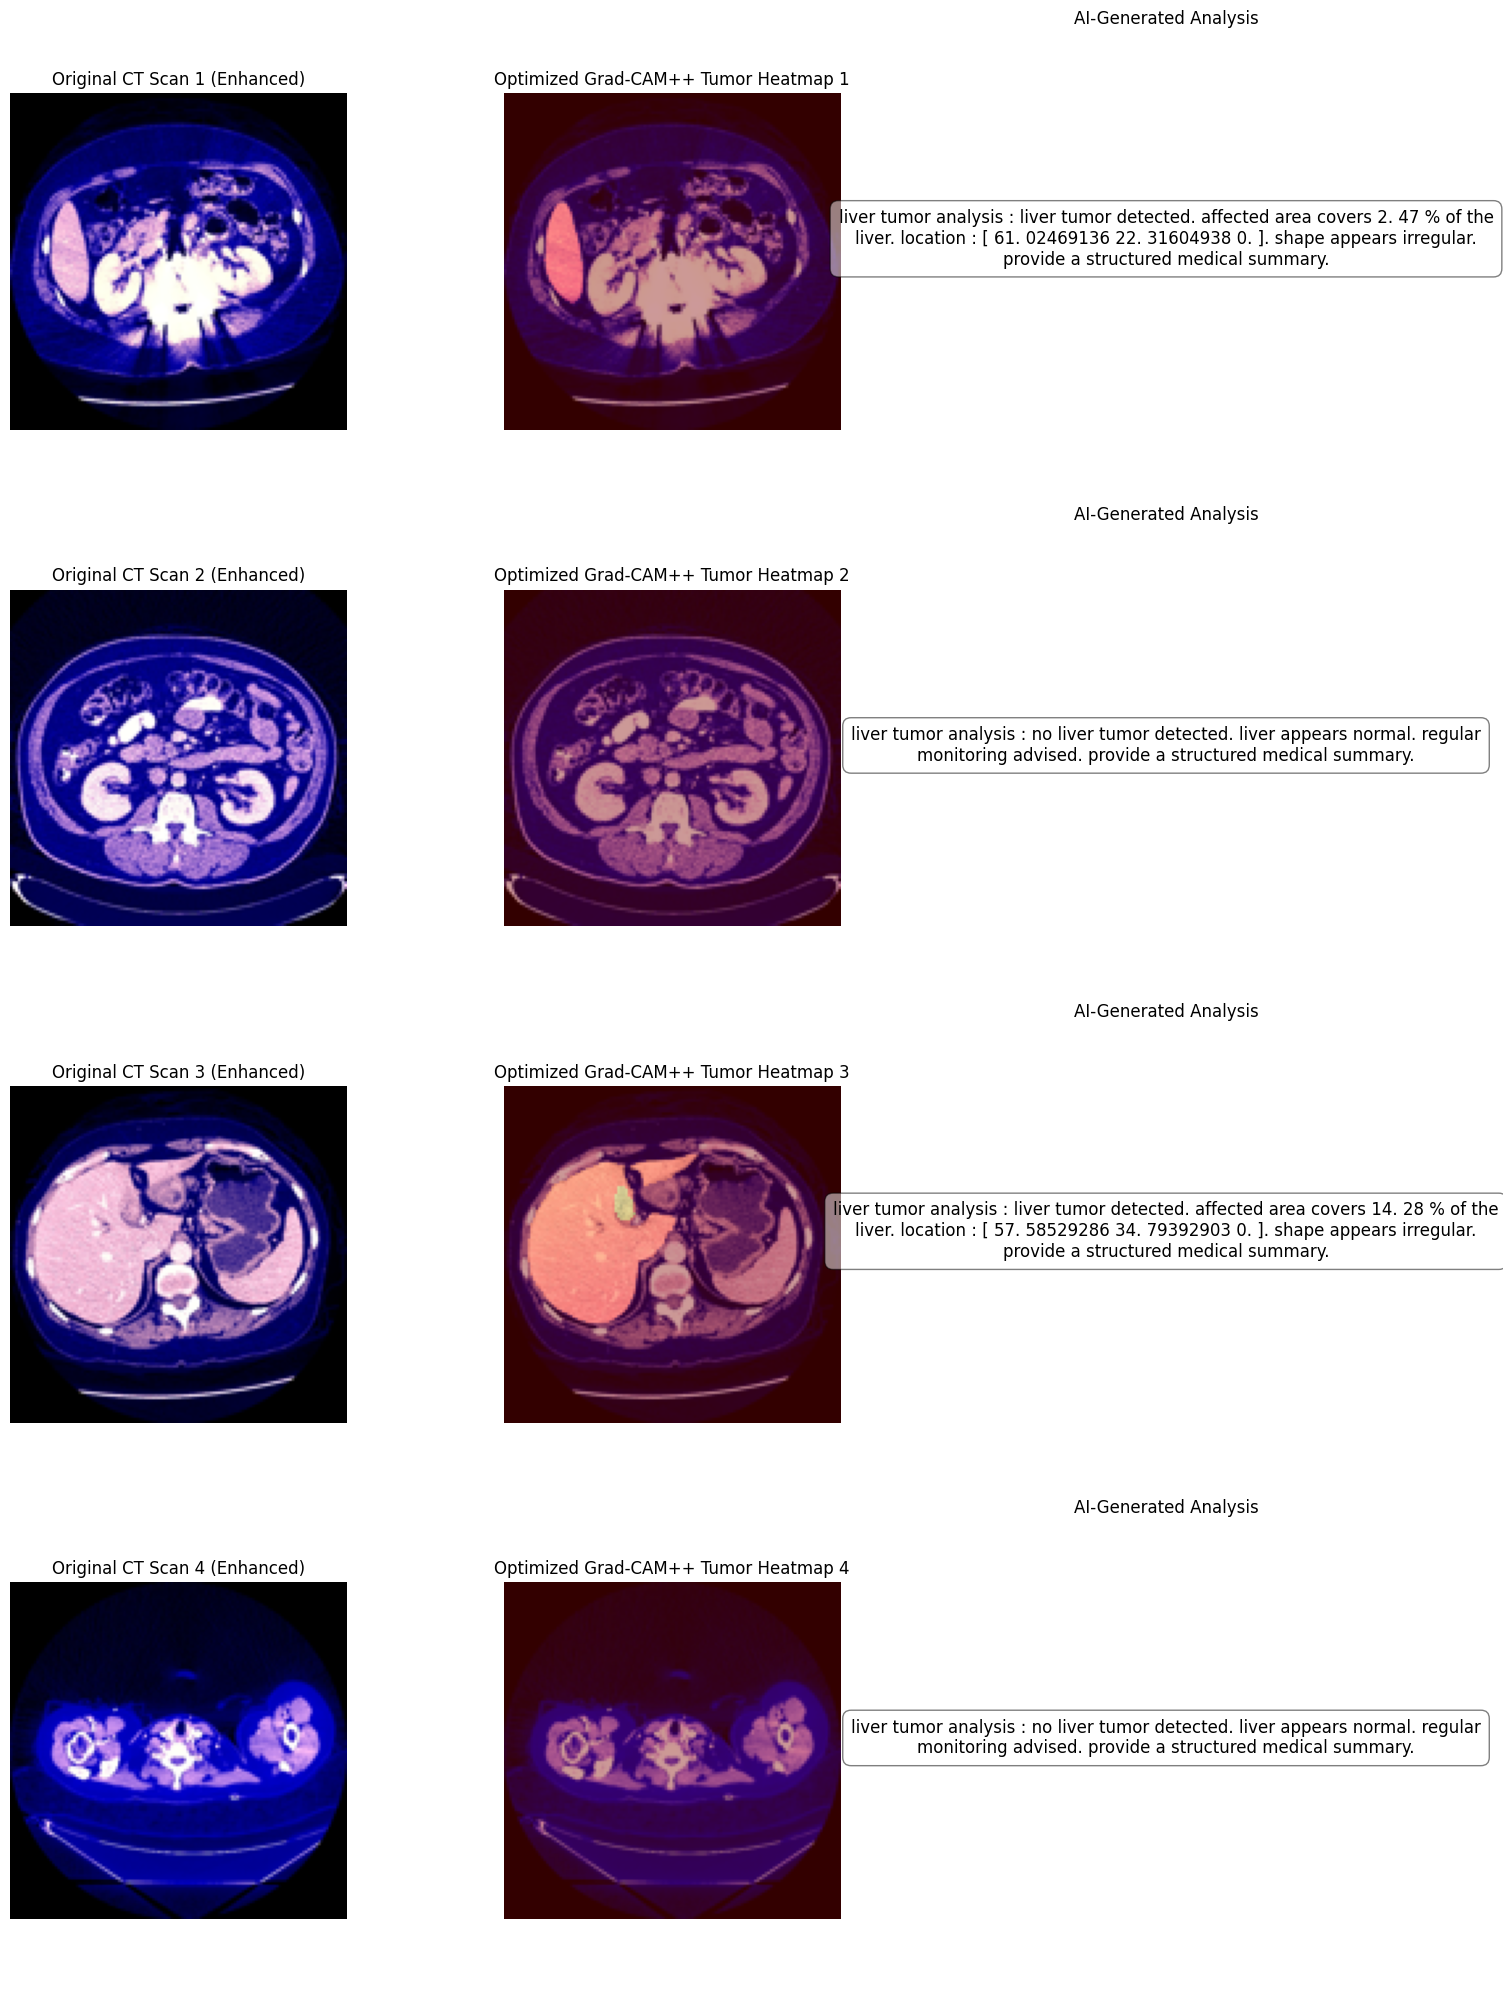

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
import tensorflow as tf
from transformers import BlipProcessor, BlipForConditionalGeneration
from torchvision import transforms
from PIL import Image
from scipy.ndimage import gaussian_filter

# ✅ Load Pretrained LLM for Text Generation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_name = "Salesforce/blip-image-captioning-base"  # BLIP vision-language model
processor = BlipProcessor.from_pretrained(model_name)
blip_model = BlipForConditionalGeneration.from_pretrained(model_name).to(device)
blip_model.eval()

# ✅ Load Pretrained Segmentation Model
model = tf.keras.models.load_model("/kaggle/working/efficientnet_unet.h5")

# ✅ Function to Adjust CT Scan Image Contrast
def enhance_contrast(image):
    """Enhance contrast of the original CT scan using histogram normalization."""
    image = image.astype(np.float32)
    min_val, max_val = np.min(image), np.max(image)
    if max_val > min_val:  # Avoid division by zero
        image = (image - min_val) / (max_val - min_val) * 255.0
    return image.astype(np.uint8)

# ✅ Function to Compute Grad-CAM++ for Liver Tumor Detection
def compute_gradcam_plus(model, img_array, mask_array, layer_name="block7a_expand_activation"):
    grad_model = tf.keras.models.Model(
        inputs=[model.input],
        outputs=[model.get_layer(layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 1]  # Focus on tumor probability
    grads = tape.gradient(loss, conv_outputs)
    grads_squared = tf.square(grads)
    grads_cubed = grads_squared * grads
    alpha_num = grads_squared
    alpha_denom = grads_squared * 2 + conv_outputs * grads_cubed
    alpha_denom = tf.where(alpha_denom != 0, alpha_denom, tf.ones_like(alpha_denom))
    alpha = alpha_num / alpha_denom
    weights = tf.reduce_mean(alpha * tf.nn.relu(grads), axis=(0, 1, 2))
    heatmap = tf.reduce_sum(weights * conv_outputs[0], axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) if np.max(heatmap) != 0 else 1
    heatmap = gaussian_filter(heatmap, sigma=2)
    mask_array = mask_array.squeeze()
    heatmap_resized = cv2.resize(heatmap, (mask_array.shape[1], mask_array.shape[0]))
    heatmap_filtered = heatmap_resized * mask_array
    return heatmap_filtered

# ✅ Function to Generate AI Explanation Using BLIP
def generate_text_from_image(img, mask):
    # Convert image to PIL format
    pil_img = Image.fromarray((img * 255).astype(np.uint8))
    
    # Extract tumor features
    tumor_pixels = np.sum(mask > 0)
    total_pixels = mask.shape[0] * mask.shape[1]
    tumor_size_ratio = (tumor_pixels / total_pixels) * 100
    tumor_position = np.mean(np.column_stack(np.where(mask > 0)), axis=0) if tumor_pixels > 0 else None

    if tumor_size_ratio > 0:
        tumor_description = (
            f"Liver tumor detected. Affected area covers {tumor_size_ratio:.2f}% of the liver. "
            f"Location: {tumor_position}. Shape appears irregular."
        )
    else:
        tumor_description = "No liver tumor detected. Liver appears normal. Regular monitoring advised."

    prompt = f"Liver Tumor Analysis: {tumor_description} Provide a structured medical summary."

    # Process image for BLIP model
    inputs = processor(pil_img, prompt, return_tensors="pt").to(device)
    with torch.no_grad():
        output = blip_model.generate(**inputs, max_new_tokens=100)
    
    return processor.decode(output[0], skip_special_tokens=True)

# ✅ Display Original Image, Grad-CAM++, and AI-Generated Analysis
num_samples = 4
fig, axes = plt.subplots(num_samples, 3, figsize=(15, 5 * num_samples))

for i in range(num_samples):
    test_img = test_images[i]
    test_mask = test_masks[i]
    test_img_batch = np.expand_dims(test_img, axis=0)

    # ✅ Apply contrast enhancement to original CT scan
    enhanced_img = enhance_contrast(test_img)

    # ✅ Compute Grad-CAM++ heatmap
    heatmap = compute_gradcam_plus(model, test_img_batch, test_mask)
    heatmap_resized = cv2.resize(heatmap, (test_img.shape[1], test_img.shape[0]))
    heatmap_resized = np.uint8(255 * heatmap_resized)
    heatmap_resized = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)

    # ✅ Ensure grayscale to RGB conversion for display
    if len(enhanced_img.shape) == 2 or enhanced_img.shape[-1] == 1:
        enhanced_img = cv2.cvtColor(enhanced_img, cv2.COLOR_GRAY2RGB)

    # ✅ Ensure matching data types before overlay
    heatmap_resized = heatmap_resized.astype(np.uint8)
    enhanced_img = enhanced_img.astype(np.uint8)

    # ✅ Overlay Grad-CAM++ on contrast-enhanced CT scan
    overlayed_img = cv2.addWeighted(enhanced_img, 0.6, heatmap_resized, 0.4, 0)

    # ✅ Display images with proper scaling
    axes[i, 0].imshow(enhanced_img, cmap="bone")
    axes[i, 0].set_title(f"Original CT Scan {i+1} (Enhanced)")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(overlayed_img)
    axes[i, 1].set_title(f"Optimized Grad-CAM++ Tumor Heatmap {i+1}")
    axes[i, 1].axis("off")

    # ✅ Fix text wrapping issue
    generated_text = generate_text_from_image(enhanced_img, test_mask)
    axes[i, 2].text(
        0.5, 0.5, generated_text, wrap=True, ha='center', fontsize=12,
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5')
    )
    axes[i, 2].set_title("AI-Generated Analysis")
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()